In [ ]:
%pip install numpy pandas scikit-learn matplotlib

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [5]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [6]:
#масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
housing_df = pd.DataFrame(X, columns=housing.feature_names)
housing_df['MedHouseVal'] = y
print(housing_df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

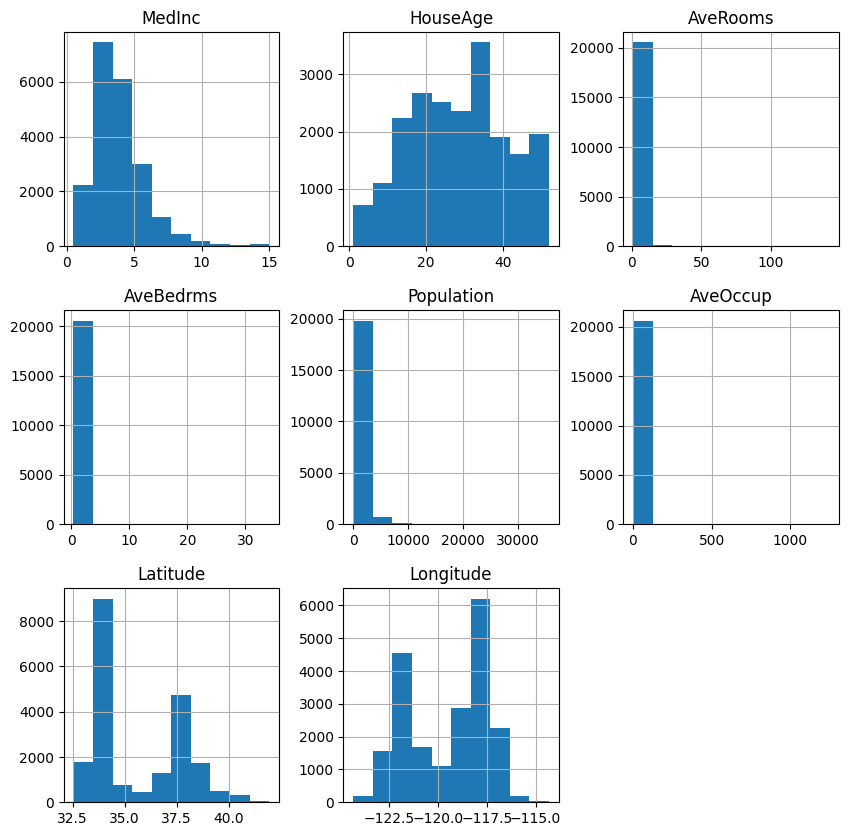

In [9]:
housing_df.hist(housing.feature_names, figsize=(10, 10))
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

#масштабирование признаков для обучающего и тестового наборов
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

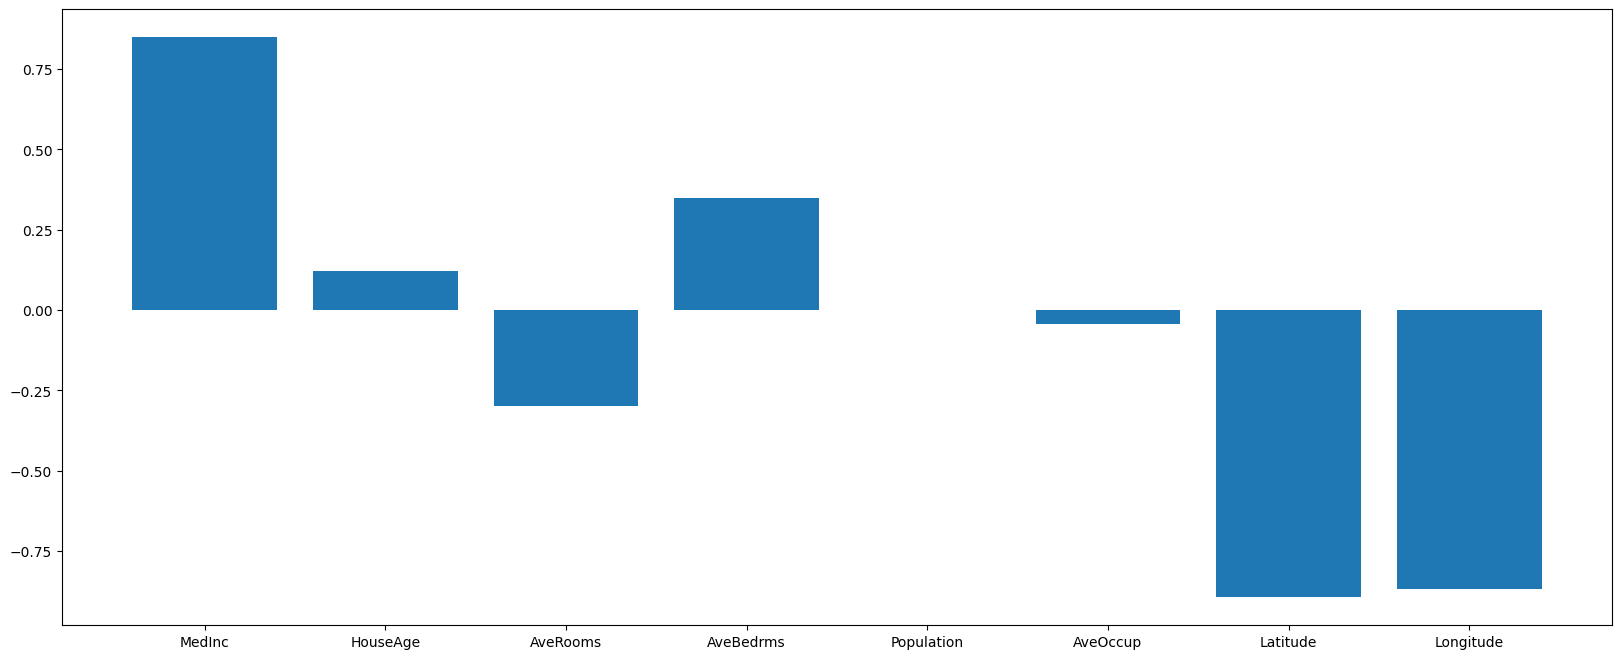

In [13]:
#визуализация весов признаков
plt.figure(figsize=(20, 8))
plt.bar(housing.feature_names, model.coef_)
plt.show()

In [14]:
#прогнозирование на обучающем и тестовом наборах
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [15]:
#вычисление среднеквадратичной ошибки (MSE) на обучающем и тестовом наборах
print(f'Train MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')

#вычисление средней абсолютной ошибки (MAE) на обучающем и тестовом наборах
print(f'Train MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred)}')

#кросс-валидация с MAE как метрикой
result = cross_val_score(estimator=LinearRegression(), X=X_scaled, y=y, scoring='neg_mean_absolute_error', cv=5)
print(f'Среднее MAE равно {-result.mean()}, стандартное отклонение MAE равно {result.std()}')

Train MSE: 0.5233910961462808
Test MSE: 0.5304858998933892
Train MAE: 0.5309954878872751
Test MAE: 0.5271979237398965
Среднее MAE равно 0.5474961907866824, стандартное отклонение MAE равно 0.021805696768185945
